In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('1.csv').drop('Unnamed: 0', axis = 1)
df.rename(columns= {'0':'Depth', '1':'qc'}, inplace = True)
df = df.iloc[5:]

# $q_c$ visualization

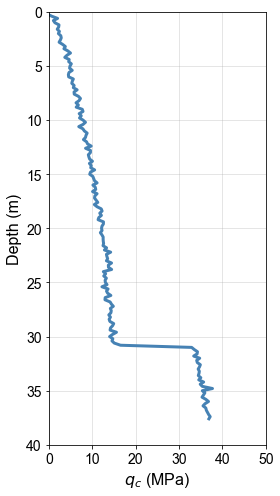

In [14]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.rc('font', **{'family' : 'Arial','weight' : 'normal'})

plt.figure(figsize=(4,7))
plt.gca().invert_yaxis()

plt.xlabel(r'$q_c$ (MPa)', fontname="Arial", fontsize=16)
plt.ylabel('Depth (m)', fontname="Arial", fontsize=16)

plt.xlim(0,50)
plt.ylim(40, 0)


plt.plot(df['qc'], df['Depth'], color = 'steelblue', alpha = 1, lw = 3)




plt.grid(alpha = .4)
plt.tight_layout()
plt.savefig('qc.jpg', dpi = 300)

# Capacity Visualization

In [15]:
import numpy as np
from scipy.stats import norm

cap = pd.read_csv('results.csv')
res = cap['prediction2'].values

C:\Users\ahtah\AppData\Local\Temp\ipykernel_5720\3394248051.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color = 'mediumvioletred')


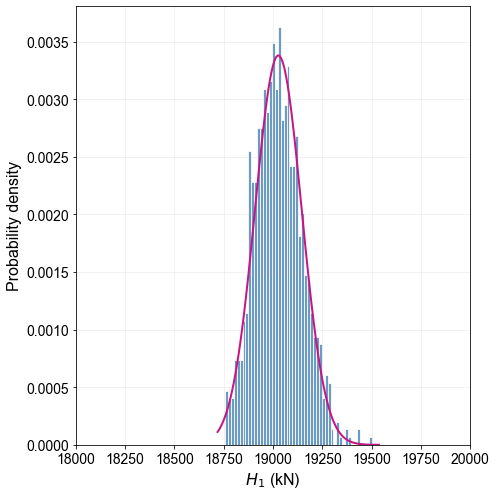

In [16]:
plt.figure(figsize = (7,7))

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.rc('font', **{'family' : 'Arial','weight' : 'normal'})
mu, std = norm.fit(res)
plt.hist(res, bins=50, density=True, alpha=.8, color='steelblue', edgecolor='white')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, color = 'mediumvioletred')


plt.xlabel(r'$H_1$ (kN)', fontname="Arial", fontsize=16)
plt.ylabel('Probability density', fontname="Arial", fontsize=16)

plt.xlim(18000, 20000)
# title = r'$μ$ = %.2f,  $σ$ = %.2f' % (mu, std)
# plt.title(title, fontdict= {'fontsize':14})

plt.grid(alpha = .2)
plt.tight_layout()
plt.savefig('fit2.jpg', dpi = 300)

# Goodness of fit

In [17]:
from scipy import stats
stats.shapiro(res)

ShapiroResult(statistic=0.9933300614356995, pvalue=0.00018528422515373677)

## It didn't word well. We stick to the visualization